In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Load the data

df = pd.read_csv('customer_churn.csv')

In [3]:
df.head(2)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1


### Data Preprocessing

In [4]:
# Check null values 

df.isnull().sum().any()

False

In [5]:
# check duplicate values

df.duplicated().sum()

0

In [6]:
# check information and datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  int64  
 1   Age                440832 non-null  int64  
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  int64  
 4   Usage Frequency    440832 non-null  int64  
 5   Support Calls      440832 non-null  int64  
 6   Payment Delay      440832 non-null  int64  
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  int64  
 11  Churn              440832 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 40.4+ MB


In [7]:
df.groupby('Subscription Type').mean(numeric_only=True)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Subscription Type,,,,,,,,,
Basic,222605.853901,39.458756,31.935347,15.808678,3.652196,13.026310,628.673496,14.488492,0.581782
Premium,226841.807806,39.323040,30.883460,15.809293,3.577671,12.916766,632.926463,14.475592,0.559417
Standard,226638.420893,39.341016,30.976859,15.804564,3.585316,12.956420,633.132253,14.478817,0.560700


### Visualization

Text(0.5, 1.0, 'Total Subscription Type')

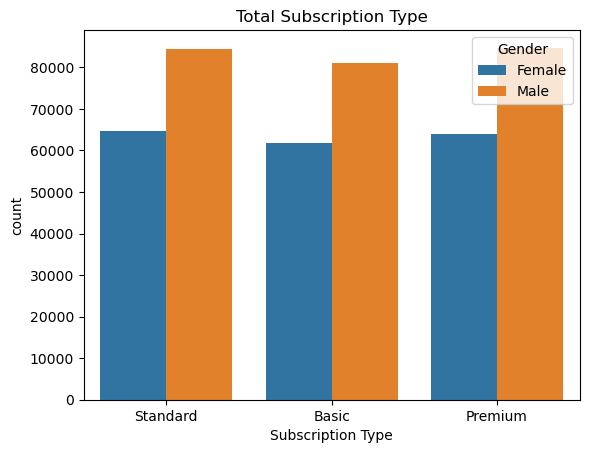

In [37]:
#Total Subscription Type
sns.countplot(data=df, x='Subscription Type', hue='Gender')
plt.title('Total Subscription Type')

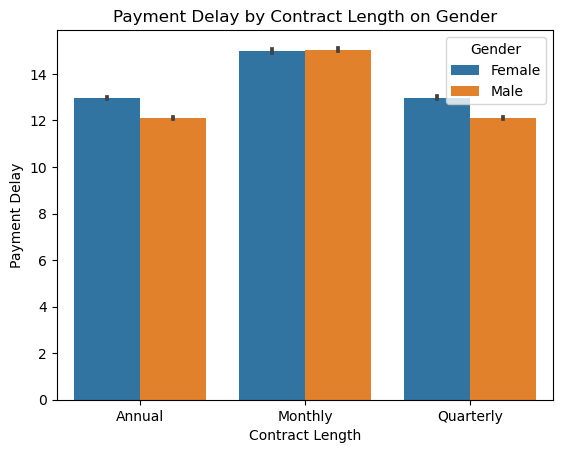

In [39]:
# Payment Delay by Contract Length
sns.barplot(x='Contract Length', y='Payment Delay', hue='Gender', data=df)
plt.title('Payment Delay by Contract Length on Gender')
plt.show()

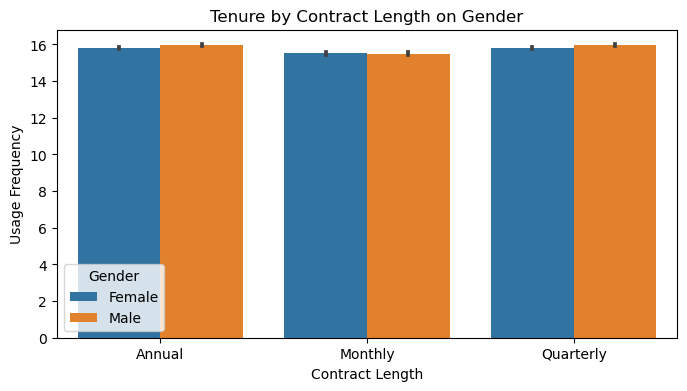

In [35]:
# Tenure by Contract Length
plt.figure(figsize=(8,4))
sns.barplot(x='Contract Length', y='Usage Frequency', hue='Gender', data=df)
plt.title('Tenure by Contract Length on Gender')
plt.show()

### Feature Engineering

#### Label Encoder

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()

In [38]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Subscription_Type_Num'] = label_encoder.fit_transform(df['Subscription Type'])
df['Contract_Length_Num'] = label_encoder.fit_transform(df['Contract Length'])

In [39]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_Num,Contract_Length_Num
0,2,30,0,39,14,5,18,Standard,Annual,932.0,17,1,2,0
1,3,65,0,49,1,10,8,Basic,Monthly,557.0,6,1,0,1
2,4,55,0,14,4,6,18,Basic,Quarterly,185.0,3,1,0,2
3,5,58,1,38,21,7,7,Standard,Monthly,396.0,29,1,2,1
4,6,23,1,32,20,5,8,Basic,Monthly,617.0,20,1,0,1


### Machine Learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# Splitting into features (X) and target variable (y)

X = df.drop(columns=['Churn', 'Subscription Type', 'Contract Length'])
y = df['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9422573071557385


C:\Users\Shakil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### KNN

In [43]:
# Model Training (KNN)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.9910964419794254

In [44]:
# Model Evaluation

y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.9997277893089251


### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.9994782628421065


### Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_gb))

0.9978223144714009


### Ensemble Model

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [59]:
# Create the ensemble model using VotingClassifier
ensemble_models = [('KNN', knn),
                   ('Decision Tree', tree_clf),
                   ('Random Forest', rf_classifier),
                   ('Gradient Boosting', gb_clf)]

voting_clf = VotingClassifier(estimators=ensemble_models, voting='soft') 
voting_clf.fit(X_train, y_train)

# Predictions
y_pred_ensemble = voting_clf.predict(X_test)

# accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)


print("Ensemble Accuracy:", accuracy_ensemble)

Ensemble Accuracy: 0.9992627627116721
